In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dist = np.random.normal(2,.5,1000)#Mean, Variance, No of Pts
dist2 = np.random.normal(0,1,1000) #Standard Normal Distribution
print(dist.shape)

(1000,)


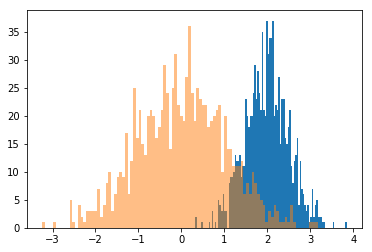

In [3]:
plt.hist(dist,100)
plt.hist(dist2,100,alpha=0.5)#Dist - Random Data Points, 100 - No of buckets 
plt.show()

# Multivariate Case

In [4]:
monkey_data = np.random.multivariate_normal([1.0,2.0],[[1.5,0.5],[0.5,1]],1000)
chimp_data = np.random.multivariate_normal([4.0,4.0],[[1,0],[0,1.8]],1000)

print(monkey_data.shape)
print(chimp_data.shape)

(1000, 2)
(1000, 2)


In [5]:
print(monkey_data[:5,:])

[[ 2.29823816  4.03788713]
 [ 0.01592729  0.84981775]
 [-1.45209178  0.78178225]
 [-0.41472155  1.51120567]
 [-1.29455668  2.18155259]]


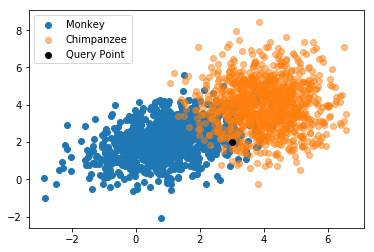

In [6]:
plt.scatter(monkey_data[:,0],monkey_data[:,1],label='Monkey')
plt.scatter(chimp_data[:,0],chimp_data[:,1],alpha=.5,label='Chimpanzee')

query_x = np.array([3,2])
plt.scatter(query_x[0],query_x[1],c='k',label='Query Point')
plt.legend()
plt.show()

## K-Nearest Neighbours

In [7]:
data = np.zeros((2000,3))
data[:1000,:-1] = monkey_data
data[1000:,:-1] = chimp_data
data[1000:,-1] = 1
print(data.shape)

(2000, 3)


In [8]:
print(data)

[[ 2.29823816  4.03788713  0.        ]
 [ 0.01592729  0.84981775  0.        ]
 [-1.45209178  0.78178225  0.        ]
 ...
 [ 3.63643358  3.59188679  1.        ]
 [ 3.85081322  4.53232489  1.        ]
 [ 3.73065836  3.56106546  1.        ]]


In [9]:
x_train = data[:,:-1]
y_train = data[:,-1]

print(x_train.shape)
print(y_train.shape)

(2000, 2)
(2000,)


In [10]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())
    
def knn(x_train,y_train,query_x,k=5):
    #First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))
        
    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    y = np.array(dist_vals)
    t = np.unique(y[:,1],return_counts=True)
    index = t[1].argmax()
    prediction  = t[0][index]
    return prediction
    

In [11]:
knn(x_train,y_train,query_x)

0.0